# COMP5318 - Machine Learning and Data Mining 

## Tutorial 5 - Classification II

**Semester 2, 2020**

**Objectives:**

* To learn about gradient descent. 
* To learn about the "linear regression" classifier.
* To learn about the Polynomial Regression,  Overfitting, and Regularization 


**Instructions:**
* Exercises to be completed on IPython notebook such as: 
   * Ipython 3 (Jupyter) notebook installed on your computer http://jupyter.org/install (you need to have Python installed first https://docs.python.org/3/using/index.html )
   * Web-based Ipython notebooks such as Google Colaboratory https://colab.research.google.com/ 
   
* If you are using Jupyter intalled on your computer, Go to File->Open. Drag and drop "lab5.ipynb" file to the home interface and click upload. 
* If you are using Google Colaboratory, Click File->Upload notebook, and and upload "lab5.ipynb" file
* Complete exercises in "lab5.ipynb".
* To run the cell you can press Ctrl-Enter or hit the Play button at the top.
* Complete all exercises marked with **TODO**.
* Save your file when you are done with the exercises, so you can show your tutor next week.


Lecturers: Nguyen Hoang Tran 

Tutors: Canh Dinh, Chen Chen, Claire Hardgrove, Fengxiang He, Henry Weld, Yixuan Zhang, Zhiyi Wang, Thomas Selvaraj.

## 1. Gradient Descent Algorithm 

#### Optimization
In general, the aim of **optimization** (a.k.a. mathematical programming) is to determine the,
* **minimum of an objective function** i.e. ${\operatorname{min}}f(x)$ , or
* **arguments $x$ that minimizes an objective function** i.e. $\underset{x}{\operatorname{argmin}}f(x)$.

The objective function is also known as loss, cost, fitness, utility, energy, etc. function. In Machine Learning and Statistics, objectives include determining parameters that maximizes likelihood (ML), minimizes negative log-likelihood (NLL), maximizes a posterior (MAP). 


#### Convex programming
If the function is convex, the local minimum is same as the global minimum. 

A convex function is defined by,
\begin{equation}
    f(\lambda x_1 + (1-\lambda) x_2) \leq \lambda f(x_1) + (1-\lambda) f(x_2) 
\end{equation}
where $\forall \lambda \in [0,1]$, $\forall x_1, x_2 \in X$ and $X$ is a convex set.


E.g. Let $f(x) := x^2$. Assume,
\begin{equation}
    \big( \lambda x_1 + (1-\lambda) x_2 \big)^2 \leq \lambda x_1^2 + (1-\lambda) x_2^2 
\end{equation}

This can be simplified,

$\lambda (1-\lambda) (x_1 - x_2)^2 \geq 0 \implies \lambda \in [0, 1] \forall x_1 \neq x_2$. \therefore $f(x) := x^2$ is convex. 

Read about logarithmically concave functions: https://en.wikipedia.org/wiki/Logarithmically_concave_function

In [1]:
import numpy as np
import matplotlib.pylab as pl
%matplotlib inline

Define the known function $f(x) = p(x-q)^2 + r$. 

In [2]:
def f(x, p=1, q=0, r=0):
    return p*(x-q)**2 + r

We can evaluate the function for any $x$.

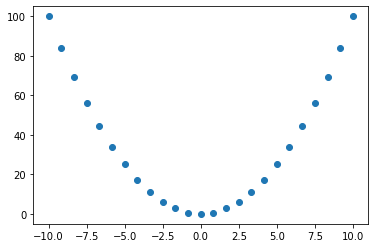

In [3]:
xx = np.linspace(-10, 10, 25)
yy = f(xx)
pl.scatter(xx, yy)

Naive methods to determine the,
* **minimum of the function** i.e. ${\operatorname{min}}f(x)$ , or
* **arguments $x$ that minimizes the function** i.e. $\underset{x}{\operatorname{argmin}}f(x)$ are,

i) inspecting $f(x)$

ii) differentiating $f(x)$ and equating to zero.

iii) plotting $f(x)$ vs. $x$ for a finite set of $x$ and inspecting visually. 

Although we know that $\underset{x}{\operatorname{argmin}}f(x) = q$ for this simple function, evaluating $\operatorname{argmin} f$ is not straightforward in many practical scenarios. Therefore, for demonstration purposes, let us assume that we have no clue about the minimum of this function. 

**Exercise 1.1:** Evaluate the following when $x=8$. 
* function i.e. $f(x=8)$
* gradient i.e. $f'(x)\rvert_{x=8}$

In [4]:
x0 = 8
f_x0 = f(x0)

delta = 1e-2
f_x0_plus_delta = f(x0 + delta)

#Gradient measures how much the output of a function changes if you change the inputs a little bit
gradient = (f_x0_plus_delta - f_x0)/delta #(change in y or f(x))/(change in x)

print('f(x={})={} and f\'(x)_(x={})={}'.format(x0, f_x0, x0, gradient))

f(x=8)=64 and f'(x)_(x=8)=16.00999999999999


Let us develop the gradient descent algorithm. The naive idea is, 
* randomly start anywhere in the curve
* iteratively, move towards the direction of steepest descent (i.e. gradient f'(x)) by taking little steps
\begin{equation}
    x \leftarrow x - \eta \cdot f'(x)
\end{equation}

where $\eta$ is the learning rate.

In [5]:
class GD(): 
    def __init__(self, eta=0.1, x0=0, max_iter=50, diff_to_stop=0.01, delta=0.01): 
        self.x0 = x0 #randomly initialize any value
        self.delta = delta #used for gradient calculations
        self.eta = eta #learning rate 
        self.diff_to_stop = diff_to_stop #stop the algorithms if steps are smaller than this value
        self.max_iter = max_iter #when to stop

    def run(self, f, plot_method=None):       
        pl.figure(figsize=(8, 4))
        xx = np.linspace(-10, 10, 100)
        yy = f(xx)
        pl.plot(xx, yy)
        pl.grid()
        
        x_new = self.x0
        iter_no = 0
        while True:
            iter_no += 1

            #main algorithm
            x = x_new #note: x_new is the position of the previous move
            grad = (f(x+self.delta) - f(x))/self.delta #evaluate the gradient at f(x)
            x_new = x - self.eta*grad #move in the direction of gradient
            #end of main algorithm

            if plot_method is 'scatter':
                pl.scatter(x_new, f(x_new), color='r')
            else:
                pl.arrow(x, f(x), x_new-x, f(x_new)-f(x), head_width=0.3, head_length=2, color='r')

            step_size = np.abs(x_new - x)
            if step_size <= self.diff_to_stop:
                print('Successfully converged with a step size of {} after {} iterations!'.format(step_size, iter_no))
                pl.scatter(x_new, f(x_new), s=200, marker='*')
                break
            elif iter_no == self.max_iter:
                print('Max iterations completed! Convergence cannot be guaranteed. Step size={}'.format(step_size))
                pl.scatter(x_new, f(x_new), s=200, marker='*')
                break

Max iterations completed! Convergence cannot be guaranteed. Step size=0.6557695999999957


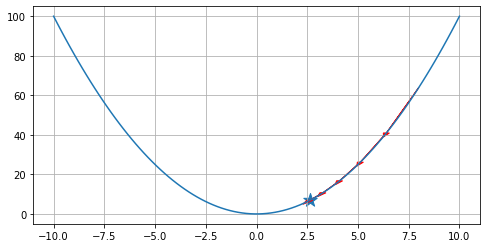

In [6]:
def f(x, p=1, q=0, r=0):
    return p*(x-q)**2 + r

GD(eta=0.1, x0=8, max_iter=5, diff_to_stop=0.01, delta=0.01).run(f)

**Exercise 1.2:** 
* Increase the maximum number of iterations in order to 50.
* Change the learning rate to different values i.e. $\eta \in \{0.05, 0.1, 0.8, 1.1\}$.

Successfully converged with a step size of 0.006022129282448782 after 16 iterations!
Successfully converged with a step size of 0.008665981339498877 after 9 iterations!


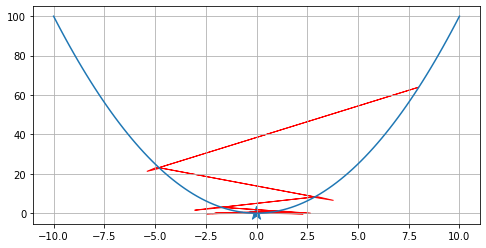

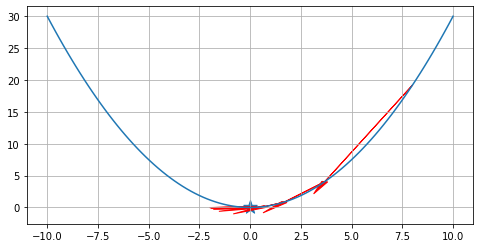

In [7]:
#In order for Gradient Descent to reach the local minimum, we have to set the learning rate to an appropriate value,
#which is neither too low nor too high. This is because if the steps it takes are too big, it maybe will not reach the
#local minimum because it just bounces back and forth between the convex function of gradient descent like you can see
#on the output plot below. If you set the learning rate to a very small value, gradient descent will eventually reach
#the local minimum but it will maybe take too much time.
ex12 = GD(eta=0.8, x0=8, max_iter=50, diff_to_stop=0.01, delta=0.01)
ex12.run(f)

#Change p to 0.3 and observe the output for eta={0.9, 1.0, 1.1}
def f2(x, p=0.3, q=0, r=0):
    return p*(x-q)**2 + r
ex12 = GD(eta=0.9, x0=8, max_iter=50, diff_to_stop=0.01, delta=0.01).run(f2)

**Exercise 1.3:** 
Can you determine $\underset{x}{\operatorname{argmin}}f(x)$ where $f(x) = -\exp(-(x-2)^2) - 0.5 \exp(-(x+2)^2)$?


Suggestion: set max_iter to $100$, x0 to $-3$. 

Successfully converged with a step size of 0.009673010702116347 after 30 iterations!


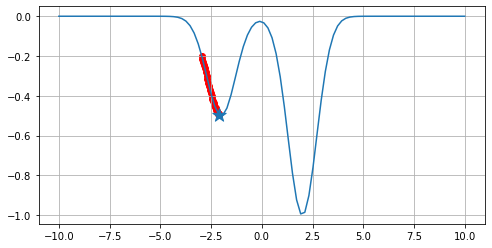

In [8]:
#Answer
def f_multimodal(x):
    return -np.exp(-(x-2)**2) - 0.5*np.exp(-(x+2)**2)

GD(eta=0.1, x0=-3, max_iter=100, diff_to_stop=0.01, delta=0.01).run(f_multimodal, plot_method='scatter')

#Sptops at local minimum. Read about momentum in gradient descent

In [9]:
#read http://scikit-learn.org/stable/modules/sgd.html#sgd

## 2. Linear Regression 

### 2.1 House Prices Dataset
**Dataset descriptions:**
* train.csv - the training set
* test.csv - the test set
* data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("./data"))

['test.csv', 'data_description.txt', 'train.csv']


In [11]:
#Load the libraries and data...
import matplotlib.pyplot as plt
import matplotlib.animation as animation

data = pd.read_csv('./data/train.csv')
print(data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

#### In this tutorial we only consider one feature the Living Area to predict the Sale Price with the expectation that the Price will increase when the Living Area increases.
However we can use more features like the number of bedroom....

In [13]:
newData = data[['GrLivArea','SalePrice']]
print(newData.head())

GrLivArea  SalePrice
0       1710     208500
1       1262     181500
2       1786     223500
3       1717     140000
4       2198     250000


(1460,)
(1460, 2)


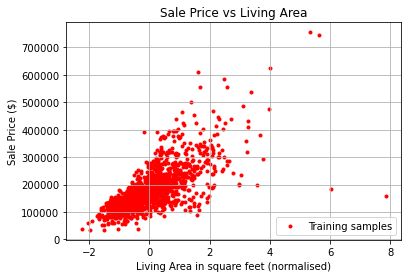

In [14]:
import matplotlib.pylab as pl
%matplotlib inline
#Grab the relevant data, scale the predictor variable, and add a column of 1s for the gradient descent...
x = newData['GrLivArea']
y = newData['SalePrice']
x = (x - x.mean()) / x.std()
print(x.shape)
x = np.c_[np.ones(x.shape[0]), x] 
print(x.shape)
pl.scatter(x[:,1], y,marker='.', color = 'r', label = 'Training samples')
pl.xlabel('Living Area in square feet (normalised)')
pl.ylabel('Sale Price ($)')
pl.legend(loc='lower right')
plt.title('Sale Price vs Living Area')
pl.grid()
pl.show()

### 2.2 Building Linear Regression model using Gradient Decent with sum square error

#### 2.2.1 Linear Model:
* input: $x \in R^D$ (covariates, predictors, features, etc)
* Output: $y \in R$ (responses, targets, outcomes, outputs, etc)
* Model: $f: x \to y$,with $f(x)=w_0+ \
\sum_{d=1}^{D}w_dx_d =w_0+w^T x.$

Minimize the Residual sum of squares:
$ RSS(w) = \sum_{n=1}^{N}[y_n-f(x_n)]^2 =  \sum_{n=1}^{N}[y_n- (w_0 + \sum_{d=1}^{D}w_dx_{nd}) ]^2 .$

#### 2.2.2 Gradient decent:
* Initialize $w =  w^{(0)}$ randomly:
* Choose learning rate $ \eta> 0$
*  Loop until convergence:

    Compute Gradient: $\nabla RSS(w) = X^T(Xw^t-y)$
    
    Update parameters: $w^{t+1} = w^t - \eta * \nabla RSS(w)$

In [15]:
#GRADIENT DESCENT
def gradient_descent(x, y, w, iterations, eta):
    past_loss = []
    past_w = [w]
    n = y.size
    for i in range(iterations):
        prediction = np.dot(x, w)
        error = prediction - y
        #loss is (y_n - f(x_n))^2
        #1/n is to find the mean
        loss = 1/(n) * np.dot(error.T, error) #TODO define loss function
        past_loss.append(loss)
        
        GradRss = np.dot(x.T, error)
        #1/n is to scale to scale the gradient to individual point
        #so each poin makes equal contribution to gradient
        w = w-  (eta *(1/n)* GradRss) #TODO Defind update rule for w
        past_w.append(w)
        
    return past_w, past_loss

In [16]:
#Pass the relevant variables to the function and get the new values back...
eta = 0.01 #Step size
iterations = 2000 #No. of iterations
np.random.seed(123) #Set the seed
w0 = np.random.rand(2) #Pick some random values to start with

past_w, past_loss = gradient_descent(x, y, w0, iterations, eta)

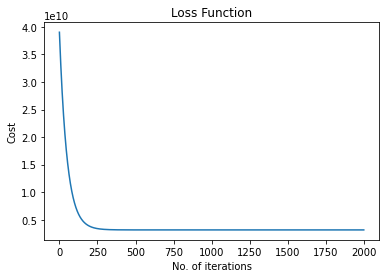

In [17]:
#Plot the cost function...
plt.title('Loss Function')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_loss)
plt.show()

### 2.2.3 The changing of model through each interation


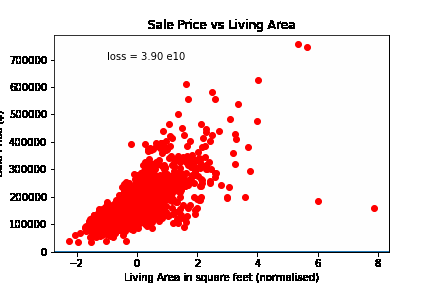

In [18]:
#Animation
#Set the plot up,
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

#Generate the animation data,
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = past_w[i][1]*x + past_w[i][0]
    line.set_data(x, y)
    annotation.set_text('loss = %.2f e10' % (past_loss[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=0, blit=True)

anim.save('animation.gif', writer='pillow', fps = 30)
#Display the animation...
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

## 3 Polynomial Regression, Overfitting and Regularization

### 3.1 Polynomial Regression

In statistics, polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x), and has been used to describe nonlinear phenomena such as the growth rate of tissues,[1] the distribution of carbon isotopes in lake sediments,[2] and the progression of disease epidemi

***Objective***: Estimate (a.k.a. predict or query) outputs for unknown inputs, given the training data $\{\mathbf{x},\mathbf{y}\}$ with datasize $n$.

We can use a nonlinear mapping:
 \begin{equation}
    \phi(x): x \in R^D \leftarrow z \in R^M 
\end{equation}
$\phi(x)$ is a polynomial feature matrix
* M is dimensionality of new features z (or $\Phi(x)$)
* M could be greater than, less than, or equal to D
Consider the non linear model with:
\begin{equation}
\phi(x) = \begin{bmatrix}
1\\
x\\
x^2\\
.\\
.\\
.\\
x^M\\
\end{bmatrix} 
\rightarrow  f(x)= w^T \phi(x) = w_0 +  w_1 x + w_2 x^2 + w_3 x^3 + ... + w_m x^m = w_0 + \sum_{m=1}^M w_mx^m
\end{equation}

Residual sum of squares:
\begin{equation}
\sum_n[w^T \phi(x_n)-y_n]^2
\end{equation}


The LMS solution can be formulated with the new design matrix:
\begin{equation}
  \mathbf{\Phi} = \begin{bmatrix}
  \phi(x_1)^T\\
  \phi(x_2)^T\\
  .\\
  .\\
  .\\
  \phi(x_N)^T
  \end{bmatrix} =  \begin{bmatrix}
  x_1^0 & x_1^1 & \cdots & x_1^m \\
  x_2^0 & x_2^1 & \cdots & x_2^m \\
  x_3^0 & x_3^1 & \cdots & x_3^m \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  x_N^0 & x_N^1 & \cdots & x_N^m
 \end{bmatrix} \in R^{NxM},  \quad 
  \mathbf{w^{LMS}} = (\mathbf{\Phi}^{\top}\mathbf{\Phi})^{-1}\mathbf{\Phi^{\top} y}
\end{equation}

Generate nonlinear data

In [19]:
import numpy as np

nTrain = 30
nTest = 20
np.random.seed(1)
xTrain = np.random.rand(nTrain, 1)*5
yTrain = 3*(xTrain -2) * (xTrain - 3)*(xTrain-4) +  10 * np.random.randn(nTrain, 1)
xTest = (np.random.rand(nTest,1) -1/8) *8
yTest = 3*(xTest -2) * (xTest - 3)*(xTest-4) +  10*np.random.randn(nTest, 1)

Plot training and testing dataset 

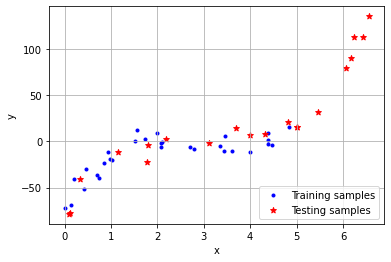

In [20]:
import matplotlib.pylab as pl
%matplotlib inline
pl.scatter(xTrain, yTrain,marker='.', color = 'b',label = 'Training samples')
pl.scatter(xTest, yTest, marker='*', color='r',label = 'Testing samples')
pl.xlabel('x')
pl.ylabel('y')
pl.legend(loc='lower right')
pl.grid()

In [21]:
def standardData(z, mean, std): 
    z_standard = (z - mean)/ std
    return z_standard

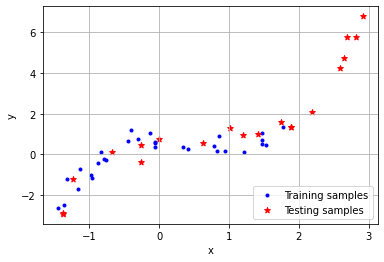

In [22]:
xTrain_n = standardData(xTrain,xTrain.mean(),xTrain.std())
yTrain_n = standardData(yTrain,yTrain.mean(),yTrain.std())
xTest_n  = standardData(xTest,xTrain.mean(),xTrain.std())
yTest_n  = standardData(yTest,yTrain.mean(),yTrain.std())
bias = 0.01
xMin = xTrain_n.min() - bias
xMax = xTrain_n.max() + bias
if(xTrain_n.min() > xTest_n.min()):
    xMin = xTest_n.min() - bias
if(xTrain_n.max() < xTest_n.max()):
    xMax = xTest_n.max() + bias

pl.scatter(xTrain_n, yTrain_n,marker='.', color = 'b',label = 'Training samples')
pl.scatter(xTest_n, yTest_n, marker='*', color='r',label = 'Testing samples')
pl.xlabel('x')
pl.ylabel('y')
pl.legend(loc='lower right')
pl.grid()

Define a Python method to generate the polynomial feature matrix. It will be used to transform $\mathbf{x}$ to $\mathbf{\phi(x)}$

In [23]:
def generate_feature_mat(x_in, m):
    # generate (Nxp matrix) feature matrix.
    # TODO:
    return x_in**np.arange(m+1)

**Train:** Evaluate $\phi(x)$ and hence determine the best weights $\mathbf{w^{LMS}}$.

In [24]:
m = 3
#print(xTrain_n)
ϕ_x = generate_feature_mat(xTrain_n, m)

w_lms = (np.linalg.pinv(ϕ_x.T.dot(ϕ_x))).dot(ϕ_x.T.dot(yTrain_n))
#TODO:
"""
Attention! - use np.linalg.pinv instead of np.linalg.inv. 
This is because, when a matrix is singular, we may have to obtain the Moore-Penrose pseudoinverse,
especially when the polynomial order is very high. 
"""

'\nAttention! - use np.linalg.pinv instead of np.linalg.inv. \nThis is because, when a matrix is singular, we may have to obtain the Moore-Penrose pseudoinverse,\nespecially when the polynomial order is very high. \n'

Generate 100 query inputs $\mathbf{x}_q$ from xMin,xMax

In [25]:
x_q = np.linspace(xMin,xMax,100)[:,np.newaxis]

**Predict:** 
Evaluate $\mathbf{\phi(x_q)}$ and hence determine outputs $\hat{\mathbf{y}}$.

In [26]:
ϕ_x_q = generate_feature_mat(x_q, m) #generate feature matrix for x_q
y_hat = ϕ_x_q.dot(w_lms) #estimated outputs (N_qx1 matrix)

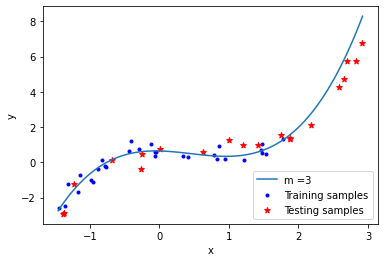

In [27]:
pl.scatter(xTrain_n, yTrain_n,marker='.', color = 'b',label = 'Training samples')
pl.scatter(xTest_n, yTest_n, marker='*', color='r',label = 'Testing samples')
pl.plot(x_q, y_hat,label= "m =" + str(m))
pl.xlabel('x')
pl.ylabel('y')
pl.legend(loc='lower right')

### 3.2 Overfitting and Regularization

**Exercise 3.1**: Perform regression for $m \in \{0, 1, 3, 4, 10\}$. Identify the models that **under-fit** and **over-fit**. Discuss how to choose a suitable model complexity. 

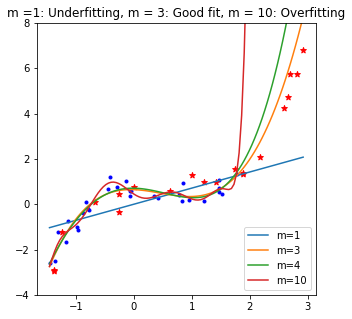

In [28]:
m_vals = np.array([1,3,4,10])
pl.figure(figsize=(5,5))
pl.scatter(xTrain_n, yTrain_n, marker='.', color='b')
pl.scatter(xTest_n, yTest_n, marker='*', color='r')
for m in m_vals:
    ϕ_x = generate_feature_mat(xTrain_n,m) 
    w_lms = (np.linalg.pinv(ϕ_x.T.dot(ϕ_x))).dot(ϕ_x.T.dot(yTrain_n))
    ϕ_x_q = generate_feature_mat(x_q, m)
    y_hat = ϕ_x_q.dot(w_lms)
    pl.plot(x_q, y_hat, label='m={}'.format(m))
pl.legend(loc='lower right')
pl.ylim([-4,8])
pl.title("m =1: Underfitting, m = 3: Good fit, m = 10: Overfitting")
pl.show()

Tikhonov ($\mathrm{L}^2$) regularization can be used to overcome overfitting. 

\begin{equation}
  \mathbf{w^{LMS}} = (\mathbf{\Phi}^{\top}\mathbf{\Phi} + \lambda \mathbf{I})^{-1}\mathbf{\Phi^{\top} y}
\end{equation}

In other words, we can cosider this as a minimization problem in the following form.
\begin{equation}
 \mathbf{w^{LMS}} = \underset{\mathbf{w}}{\operatorname{argmin}} \| \mathbf{w^T\phi(x) - y}\|_2^2
 + \lambda \| \mathbf{w} \|_2^2
\end{equation}

**Exercise 3.2** : Define the loss function between real output and predicted output based on Residual sum of squares function

In [29]:
# Loss function
from sklearn.metrics import mean_squared_error
def loss(yPre,y):
    loss = mean_squared_error(y,yPre)
    return loss

**Exercise 3.3**: Test the following code for different values of the regularization parameter $\lambda$ and obseve the changing of traning loss and testing loss. Choose the best value for regularization parameter

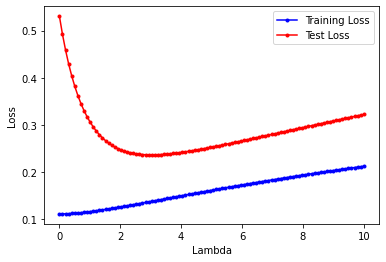

In [37]:
lambda_val = np.linspace(0,10,100)[:,np.newaxis]
m = 3
trainLoss = []
testLoss = []
for lamb in lambda_val:
    ϕ_x_train = generate_feature_mat(xTrain_n, m)
    ϕ_x_test = generate_feature_mat(xTest_n, m)
    w_lms = (np.linalg.pinv(ϕ_x_train.T.dot(ϕ_x_train)+lamb*np.eye(ϕ_x_train.shape[1]))).dot(ϕ_x_train.T.dot(yTrain_n))
    trainLoss.append(loss(ϕ_x_train.dot(w_lms),yTrain_n))
    testLoss .append(loss(ϕ_x_test.dot(w_lms),yTest_n))
pl.plot(lambda_val, trainLoss, marker='.', color='b',label = "Training Loss")
pl.plot(lambda_val, testLoss, marker='.', color='r',label = "Test Loss")
pl.legend()
pl.xlabel('Lambda')
pl.ylabel('Loss')
pl.show()
print()